<a href="https://colab.research.google.com/github/Mickey1225/gapnote_flask/blob/main/advertising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
url='https://github.com/books-by-chansung/low-code-ai/blob/main/advertising_2023.csv?raw=true'
advertising_df=pd.read_csv(url,index_col=0)
advertising_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


from matplotlib import pyplot as plt
_df_0['digital'].plot(kind='hist', bins=20, title='digital')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['radio'].plot(kind='hist', bins=20, title='radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['newspaper'].plot(kind='hist', bins=20, title='newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='digital', y='TV', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='TV', y='radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='radio', y='newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='newspaper', y='sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['digital'].plot(kind='line', figsize=(8, 4), title='digital')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['radio'].plot(kind='line', figsize=(8, 4), title='radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['newspaper'].plot(kind='line', figsize=(8, 4), title='newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

In [3]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [4]:
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [5]:
advertising_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


In [6]:
advertising_df.isnull().values.any()

False

<Axes: >

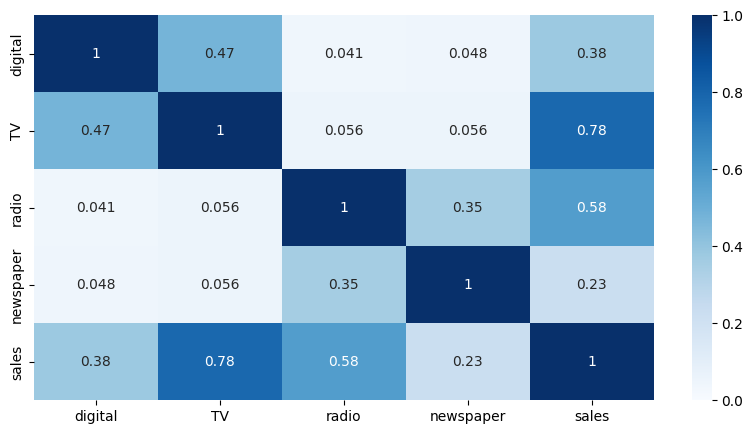

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='Blues')

<Axes: xlabel='[digital]', ylabel='sales'>

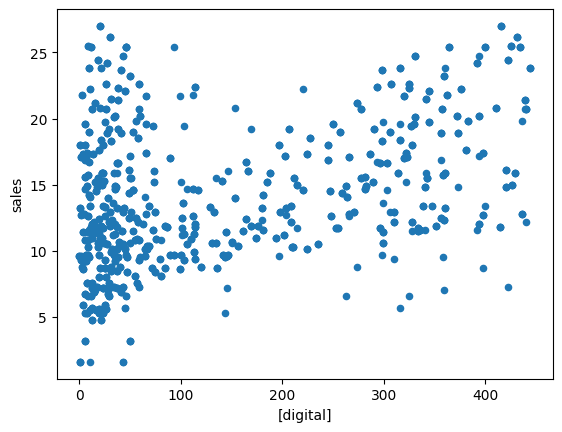

In [8]:
advertising_df.plot(kind='scatter', x=['digital'], y='sales') #산점도

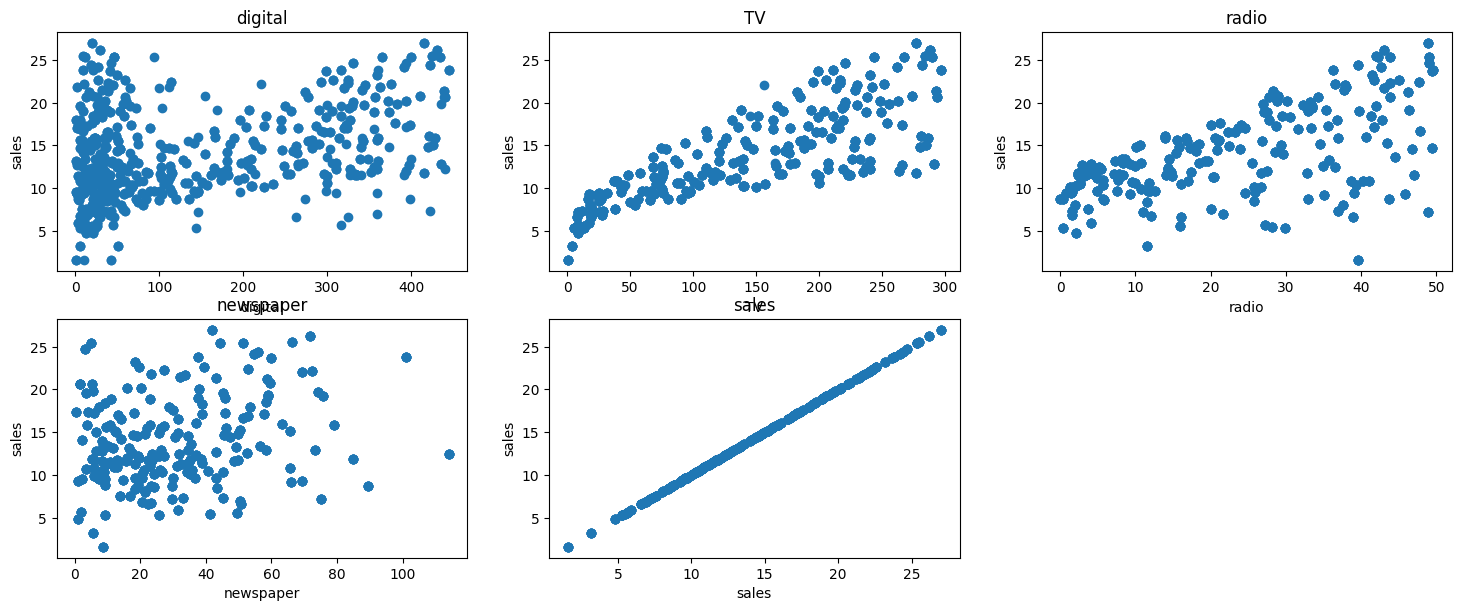

In [16]:
plt.figure(figsize=(18,18)) #가격 열(마지막 열)을 제외한 모든 열을 반복
for i, col in enumerate(advertising_df.columns[0:13]):
    plt.subplot(5,3,i+1) #열마다 세 개의 그래프
    x = advertising_df[col]
    y = advertising_df['sales']
    plt.plot(x,y,'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('sales')


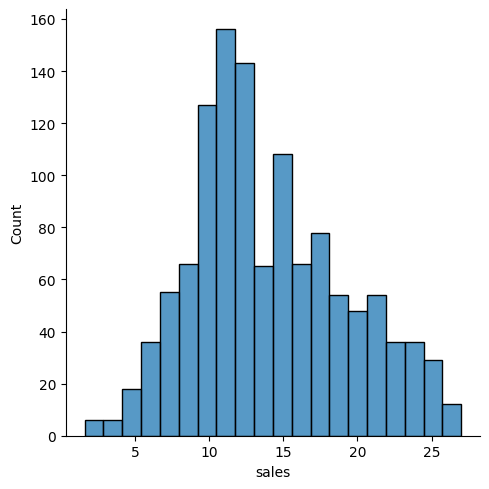

In [17]:
sns.displot(advertising_df, x="sales") # 히스토그램

<ipython-input-22-b6138e74e5e8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df[i])
<ipython-input-22-b6138e74e5e8>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(advertising_df[i])
<ipython-input-22-b6138e74e5e8>:6: UserWarning: 

`distplot` is a deprecated function and will b

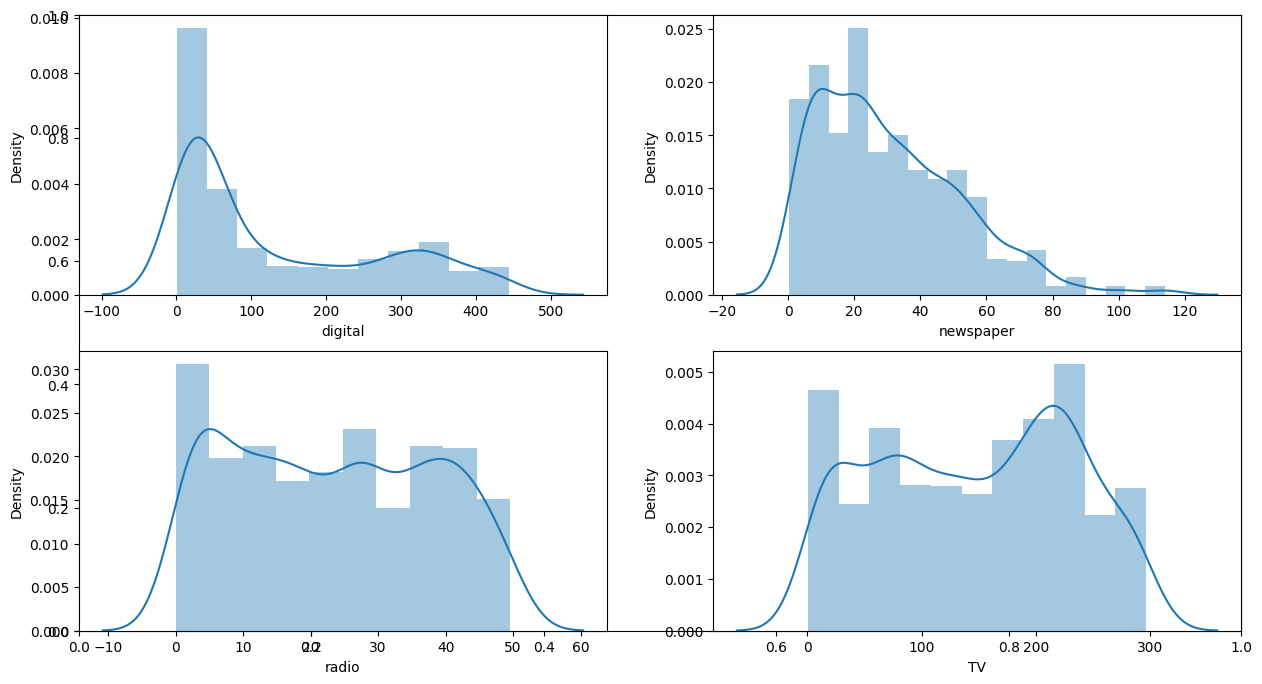

In [22]:
lis=['digital', 'newspaper', 'radio', 'TV']
plt.subplots(figsize=(15,8))
index=1
for i in lis:
  plt.subplot(2,2,index)
  sns.distplot(advertising_df[i])
  index+=1
